In [3]:
#!pip install pycaret==2.1.2

## Importación de datos

In [4]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocesamiento

In [5]:
from pycaret.regression import *

In [24]:
s = setup(data, target = 'charges', 
          normalize=True,
          transform_target=True,
          numeric_imputation = 'mean',
          categorical_features=['sex', 'region'],
          silent=True,
          #profile = True,
          session_id = 123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
get_config('X')

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Entrenamiento de modelos

In [26]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,2319.3437,23186614.1897,4795.2553,0.8338,0.4097,0.2132,0.2711
1,Gradient Boosting Regressor,2320.3587,23755872.1444,4849.7216,0.8316,0.3930,0.1923,0.0951
2,Light Gradient Boosting Machine,2583.7479,24768395.2081,4960.7428,0.8219,0.4155,0.2207,0.0999
3,AdaBoost Regressor,3459.9467,25195945.8701,5006.9307,0.8179,0.5049,0.4788,0.0346
4,CatBoost Regressor,2626.0031,26053860.9474,5077.7614,0.8166,0.4117,0.2178,1.3134
5,Extra Trees Regressor,2425.1143,26430145.7291,5100.9724,0.8140,0.4334,0.2275,0.1609
6,Support Vector Machine,2419.9143,26345795.5275,5108.4304,0.8149,0.3918,0.1401,0.0348
7,Extreme Gradient Boosting,3102.0043,39391171.4413,5999.6709,0.7159,0.4561,0.2787,0.1824
8,Decision Tree,3089.2187,43050062.5068,6507.5799,0.6920,0.5217,0.3436,0.0058
9,K Neighbors Regressor,3858.4172,51034479.2502,7060.7630,0.6515,0.4807,0.2839,0.0069


In [27]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2122.9187,19378640.0119,4402.1177,0.8843,0.3879,0.2016
1,2501.5341,30048487.9087,5481.6501,0.8253,0.4268,0.1973
2,2339.7913,22343986.0070,4726.9426,0.7171,0.4973,0.2499
3,2340.1706,21659903.6247,4654.0202,0.8191,0.4093,0.2364
4,2796.7854,30313619.2837,5505.7805,0.7745,0.5378,0.2916
5,2478.9766,21101740.0315,4593.6630,0.8643,0.3451,0.1975
6,2038.9806,19435597.0589,4408.5822,0.8678,0.3060,0.1781
7,2215.2231,22941941.8760,4789.7747,0.8738,0.4076,0.1620
8,1924.3678,17370303.8152,4167.7696,0.8878,0.3135,0.1889
9,2434.6889,27271922.2789,5222.2526,0.8243,0.4658,0.2291


## Optimizacion de modelos

In [29]:
tuned_rf = tune_model(rf,
                      optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1955.6118,17932818.1857,4234.7158,0.8929,0.3444,0.1718
1,2597.8724,29735059.6476,5452.9863,0.8271,0.4013,0.2035
2,2154.3555,20776475.7563,4558.1220,0.7369,0.4580,0.1992
3,2165.0881,19762023.4150,4445.4497,0.8350,0.3797,0.2098
4,2394.7820,26073780.8659,5106.2492,0.8061,0.4600,0.1856
5,2273.7180,18660114.9516,4319.7355,0.8800,0.3201,0.1724
6,1936.9547,17604560.2518,4195.7789,0.8802,0.2989,0.1729
7,2198.6175,23904325.1765,4889.2050,0.8686,0.4261,0.1636
8,2089.5353,19414722.8834,4406.2141,0.8746,0.3432,0.1980
9,2219.7876,24133030.2651,4912.5381,0.8446,0.4030,0.1778


## Evaluación del modelo

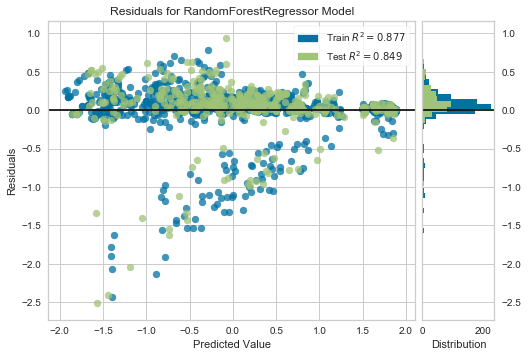

In [30]:
plot_model(tuned_rf)

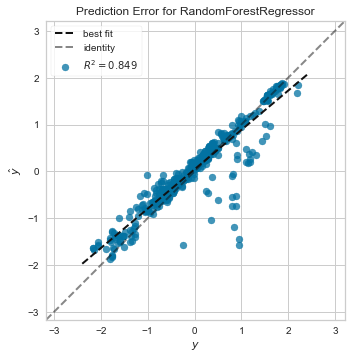

In [31]:
plot_model(tuned_rf, plot='error')

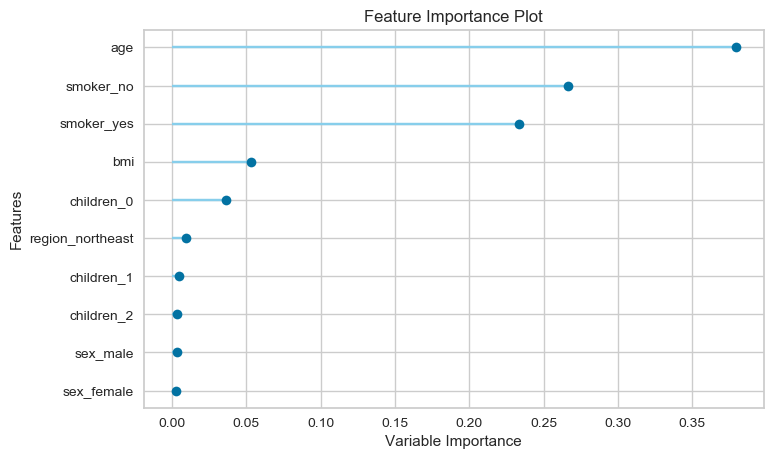

In [32]:
plot_model(tuned_rf, plot='feature')

## Guardado del modelo

In [13]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


## Prediccion con el servicio

In [14]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [15]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             t

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
